# Import Required Libraries
Import pandas for data processing, matplotlib for visualization, glob for file handling, and os for path operations.

In [118]:
# Import Required Libraries
import pandas as pd  # For data processing
import matplotlib.pyplot as plt  # For visualization
import glob  # For file handling
import os  # For path operations
import numpy as np  # For numerical operations

# Load CSV Files
Use glob to get all CSV files in the root directory and create a function to read and validate each file's structure.

In [119]:
# Function to read and validate CSV files and split them into 8 DataFrames
def load_csv_files():
    csv_files = glob.glob(os.path.join(os.getcwd(), "*.csv"))  # Get all CSV files in the root directory
    data_frames = {f"df{i}": [] for i in range(1, 9)}  # Create a dictionary to hold 8 DataFrames
    
    for file in csv_files:
        filename = os.path.basename(file)
        
        # Check if filename matches the pattern CA_Q{i}_{m} where m >= 15
        import re
        match = re.match(r'CA_Q([1-8])_(\d+)\.csv', filename)
        
        if match:
            i = int(match.group(1))  # Quadrant number
            m = int(match.group(2))  # m value
            
            # Only process if m <= 15
            if m <= 15:
                df = pd.read_csv(file)
                
                # Validate the structure of the CSV file
                if 'Kills' in df.columns and 'Total Deaths' in df.columns:
                    data_frames[f"df{i}"].append(df)
                    print(f"File {filename} has been added to df{i}.")
                else:
                    print(f"File {filename} does not have the required structure.")
        else:
            print(f"File {filename} does not match the required naming pattern CA_Q[1-8]_[m].csv where m >= 15.")
    
    # Combine files for each prefix into a single DataFrame
    for i in range(1, 9):
        data_frames[f"df{i}"] = pd.concat(data_frames[f"df{i}"], ignore_index=True) if data_frames[f"df{i}"] else pd.DataFrame()
    
    return data_frames

# Load the CSV files and split them into 8 DataFrames
data_frames = load_csv_files()

# Access individual DataFrames
df1 = data_frames["df1"] # Q1, niched
df2 = data_frames["df2"] # Q2, niched
df3 = data_frames["df3"] # Q3, niched
df4 = data_frames["df4"] # Q4, niched
df5 = data_frames["df5"] # Q1, not niched
df6 = data_frames["df6"] # Q2, not niched
df7 = data_frames["df7"] # Q3, not niched
df8 = data_frames["df8"] # Q4, not niched

File CA_Q1_1.csv has been added to df1.
File CA_Q1_10.csv has been added to df1.
File CA_Q1_11.csv has been added to df1.
File CA_Q1_12.csv has been added to df1.
File CA_Q1_13.csv has been added to df1.
File CA_Q1_14.csv has been added to df1.
File CA_Q1_15.csv has been added to df1.
File CA_Q1_2.csv has been added to df1.
File CA_Q1_3.csv has been added to df1.
File CA_Q1_4.csv has been added to df1.
File CA_Q1_5.csv has been added to df1.
File CA_Q1_6.csv has been added to df1.
File CA_Q1_7.csv has been added to df1.
File CA_Q1_8.csv has been added to df1.
File CA_Q1_9.csv has been added to df1.
File CA_Q2_1.csv has been added to df2.
File CA_Q2_10.csv has been added to df2.
File CA_Q2_11.csv has been added to df2.
File CA_Q2_12.csv has been added to df2.
File CA_Q2_13.csv has been added to df2.
File CA_Q2_14.csv has been added to df2.
File CA_Q2_15.csv has been added to df2.
File CA_Q2_2.csv has been added to df2.
File CA_Q2_3.csv has been added to df2.
File CA_Q2_4.csv has been ad

Determined parameters: 15 members per group, 924 minutes total duration

Data filtering complete. Rows per DataFrame after filtering:
df1: 13860 rows
df2: 13860 rows
df3: 13860 rows
df4: 13860 rows
df5: 13860 rows
df6: 13860 rows
df7: 13860 rows
df8: 13860 rows


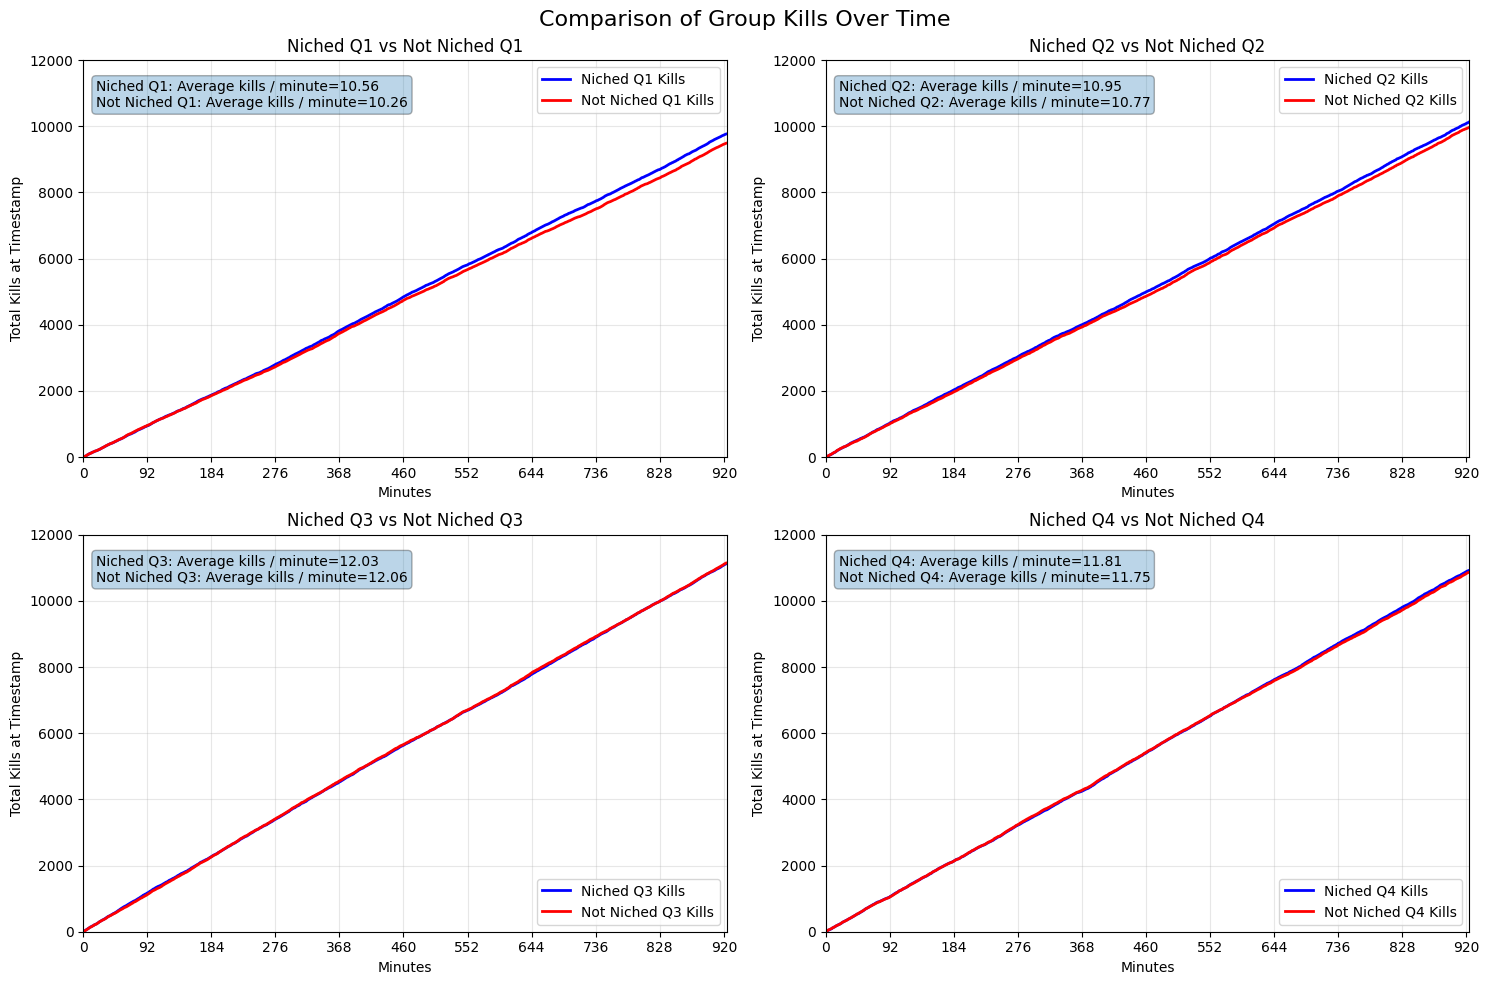


Summary Statistics - Group Kills per Minute:
df1: Total=4464059, Avg=4831.23/min, Max=9760/min
df2: Total=4661472, Avg=5044.88/min, Max=10115/min
df3: Total=5180870, Avg=5607.00/min, Max=11116/min
df4: Total=5022956, Avg=5436.10/min, Max=10914/min
df5: Total=4349517, Avg=4707.27/min, Max=9481/min
df6: Total=4571592, Avg=4947.61/min, Max=9952/min
df7: Total=5188501, Avg=5615.26/min, Max=11141/min
df8: Total=5011339, Avg=5423.53/min, Max=10857/min


In [ ]:
kill_lim = 12000
total_mins = 864

# Plot kills over time comparisons for each pair
pairs = [('df1', 'df5'), ('df2', 'df6'), ('df3', 'df7'), ('df4', 'df8')]
pair_labels = ['Niched Q1 vs Not Niched Q1', 'Niched Q2 vs Not Niched Q2', 'Niched Q3 vs Not Niched Q3', 'Niched Q4 vs Not Niched Q4']

# Create a 2x2 grid of subplots for the four comparisons
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()  # Flatten to easily iterate through axes

# Determine experiment parameters dynamically
# Calculate members per group and experiment duration
members_per_group = float('inf')  # Start with infinity
max_minutes = 0

# Find the smallest non-empty DataFrame to determine members per group
# and the minimum time to determine experiment duration
for df_name in ['df1', 'df2', 'df3', 'df4', 'df5', 'df6', 'df7', 'df8']:
    df = eval(df_name)
    if not df.empty:
        # Count unique timestamps to determine how many members per timestamp
        if 'Time Elapsed' in df.columns:
            timestamps = df['Time Elapsed'].unique()
            if len(timestamps) > 0:
                # Count rows for first timestamp to determine members per group
                first_timestamp = timestamps[0]
                members_count = len(df[df['Time Elapsed'] == first_timestamp])
                members_per_group = min(members_per_group, members_count)
                
                # Find minimum time in minutes
                max_time_seconds = df['Time Elapsed'].max()
                max_time_minutes = max_time_seconds // 60
                max_minutes = max(max(max_minutes, max_time_minutes) - 3, 0) # Takes about 3 minutes to launch everything

# Default values if calculation fails
if members_per_group == float('inf'):
    members_per_group = 16  # Default value
    print("Warning: Could not determine members per group, using default value of 16")

if max_minutes == 0:
    max_minutes = 60  # Default value
    print("Warning: Could not determine experiment duration, using default value of 60 minutes")

print(f"Determined parameters: {members_per_group} members per group, {max_minutes+1} minutes total duration")
minutes = min(int(max_minutes) + 1, total_mins)  # Clamp between 1 and total_mins

# Preprocess data - filter each DataFrame to include only the required data
filtered_dfs = {}
for df_name in ['df1', 'df2', 'df3', 'df4', 'df5', 'df6', 'df7', 'df8']:
    df = eval(df_name)
    if not df.empty and 'Time Elapsed' in df.columns:
        # Filter by time: only include data within the time limit
        max_seconds = max_minutes * 60
        df_filtered_time = df[df['Time Elapsed'] <= max_seconds]
        
        # Filter by members: ensure consistent group size at each timestamp
        filtered_time_points = []
        for time_point in sorted(df_filtered_time['Time Elapsed'].unique()):
            time_group = df_filtered_time[df_filtered_time['Time Elapsed'] == time_point]
            # If we have more members than needed, take only the first members_per_group
            if len(time_group) > members_per_group:
                filtered_time_points.append(time_group.iloc[:members_per_group])
            else:
                filtered_time_points.append(time_group)
        
        # Combine all filtered time points
        if filtered_time_points:
            filtered_dfs[df_name] = pd.concat(filtered_time_points, ignore_index=True)
        else:
            filtered_dfs[df_name] = pd.DataFrame()
    else:
        filtered_dfs[df_name] = pd.DataFrame()

print("\nData filtering complete. Rows per DataFrame after filtering:")
for df_name, df in filtered_dfs.items():
    print(f"{df_name}: {len(df)} rows")

df_identifier = {
    'df1': 'Niched Q1',
    'df2': 'Niched Q2',
    'df3': 'Niched Q3',
    'df4': 'Niched Q4',
    'df5': 'Not Niched Q1',
    'df6': 'Not Niched Q2',
    'df7': 'Not Niched Q3',
    'df8': 'Not Niched Q4'
    }

# Plot comparison graphs using the filtered data
for i, (df1_name, df2_name) in enumerate(pairs):
    ax = axes[i]
    df1 = filtered_dfs[df1_name]
    df2 = filtered_dfs[df2_name]
    
    # Initialize arrays to store data for each minute
    df1_kills_per_minute = np.zeros(minutes)
    df2_kills_per_minute = np.zeros(minutes)
    
    # Extract the TOTAL kills across all agents at each minute
    if not df1.empty and 'Time Elapsed' in df1.columns:
        for minute in range(minutes):
            time_seconds = minute * 60
            minute_data = df1[df1['Time Elapsed'] == time_seconds]
            if not minute_data.empty:
                # Sum kills across all agents at this timestamp
                df1_kills_per_minute[minute] = minute_data['Kills'].sum()
    
    if not df2.empty and 'Time Elapsed' in df2.columns:
        for minute in range(minutes):
            time_seconds = minute * 60
            minute_data = df2[df2['Time Elapsed'] == time_seconds]
            if not minute_data.empty:
                df2_kills_per_minute[minute] = minute_data['Kills'].sum()
    
    # Create x-axis representing minutes
    minutes_range = np.arange(minutes)

    # Plot data - using the total kills at each minute (not cumulative)
    ax.plot(minutes_range, df1_kills_per_minute, label=f'{df_identifier[df1_name]} Kills', color='blue', linewidth=2)
    ax.plot(minutes_range, df2_kills_per_minute, label=f'{df_identifier[df2_name]} Kills', color='red', linewidth=2)
    
    # Disable scientific notation on y-axis
    ax.ticklabel_format(style='plain', axis='y')
    
    # Add labels and grid
    ax.set_xlabel('Minutes')
    ax.set_ylabel('Total Kills at Timestamp')
    ax.set_title(pair_labels[i])
    ax.grid(True, alpha=0.3)
    ax.set_xticks(np.arange(0, minutes, step=max(1, minutes//10)))
    ax.legend()
    ax.set_xlim(0, minutes)  # Set y-axis limit to kill_lim
    ax.set_ylim(0, kill_lim)  # Set y-axis limit to kill_lim
    
    # Add text with statistics - use the final kill count from the last minute
    final_df1_kills = df1_kills_per_minute[-1] if df1_kills_per_minute.size > 0 else 0
    final_df2_kills = df2_kills_per_minute[-1] if df2_kills_per_minute.size > 0 else 0
    
    #stats_text = f"{df_identifier[df1_name]}: Final={int(final_df1_kills)}\n"
    #stats_text += f"{df_identifier[df2_name]}: Final={int(final_df2_kills)}"
    stats_text = f"{df_identifier[df1_name]}: Average kills / minute={float(final_df1_kills / max(1, minutes)):.2f}\n"
    stats_text += f"{df_identifier[df2_name]}: Average kills / minute={float(final_df2_kills / max(1, minutes)):.2f}"
    
    ax.text(0.02, 0.95, stats_text, transform=ax.transAxes, 
            verticalalignment='top', bbox={'boxstyle': 'round', 'alpha': 0.3})

plt.tight_layout()
plt.suptitle(f'Comparison of Group Kills Over Time', fontsize=16)
plt.subplots_adjust(top=0.93)
plt.show()

# Print summary statistics for each group
print("\nSummary Statistics - Group Kills:")
for df_name, df in filtered_dfs.items():
    if not df.empty and 'Time Elapsed' in df.columns:
        # Get the final timestamp
        max_time = df['Time Elapsed'].max()
        final_data = df[df['Time Elapsed'] == max_time]
        
        if not final_data.empty:
            # Get the sum of kills at the final timestamp
            final_kills = final_data['Kills'].sum()
            # Calculate average kills per minute
            avg_kills_per_min = final_kills / max(1, minutes)
            
            # Get maximum kill count at any timestamp
            timestamps = sorted(df['Time Elapsed'].unique())
            max_kills_at_timestamp = max([df[df['Time Elapsed'] == t]['Kills'].sum() for t in timestamps])
            
            print(f"{df_identifier[df_name]}: Final Total={final_kills}, Avg={avg_kills_per_min:.2f}/min, Max kills={max_kills_at_timestamp}")
        else:
            print(f"{df_identifier[df_name]}: No data points at final timestamp")
    else:
        print(f"{df_identifier[df_name]}: Empty DataFrame or missing Time Elapsed column")